# Part I

In [82]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [83]:
testSet = pd.read_csv('http://pluto.hood.edu/~dong/datasets/CBC_800.csv',header='infer')
testSet.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1576,13039,0,166,14,2,16,0,1,0,0,0,0,0,0,0,0,0
1,693,6096,1,245,14,1,14,0,0,1,0,0,0,0,0,0,0,0
2,3222,26528,1,99,12,2,18,0,0,0,1,0,0,0,0,0,0,0
3,3734,31047,0,178,24,1,24,1,0,0,0,0,0,0,1,0,0,0
4,1245,10403,1,314,12,2,16,1,0,0,0,0,0,0,0,0,0,0


In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers)  # Training data
testSetX_scaled = scaler.transform(testSetX)     # Test data

# Perform PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)  # Fit PCA on training data
X_test_pca = pca.transform(testSetX_scaled)  # Apply PCA to test data

# Fixing column name bug
pca_columns = [f"PCA_{i+1}" for i in range(pca.n_components_)]
X_pca = pd.DataFrame(X_pca, columns=pca_columns)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)

testSetY = testSet['Florence']


In [86]:
data = pd.read_csv('http://pluto.hood.edu/~dong/datasets/CBC_3200.csv',header='infer')
data.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1712,14148,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1
1,3042,25193,1,217,6,1,6,0,0,0,0,0,0,0,0,0,0,0
2,204,1784,1,32,12,1,12,0,0,0,0,0,0,0,0,0,0,0
3,3628,30102,0,199,8,2,10,0,0,0,0,0,1,2,0,0,0,0
4,444,3989,1,203,16,2,24,1,0,1,0,0,0,0,1,0,0,0


In [87]:
data = data.replace('?',np.NaN)

print('Number of missing values by column:')
print(data.isna().sum())

print("\nTotal number of missing values = %d" % (data.isna().sum().sum()))

print('\nNumber of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of missing values by column:
Seq#          0
ID#           0
Gender        0
M             0
R             0
F             0
FirstPurch    0
ChildBks      0
YouthBks      0
CookBks       0
DoItYBks      0
RefBks        0
ArtBks        0
GeogBks       0
ItalCook      0
ItalAtlas     0
ItalArt       0
Florence      0
dtype: int64

Total number of missing values = 0

Number of instances = 3200
Number of attributes = 18


<Axes: >

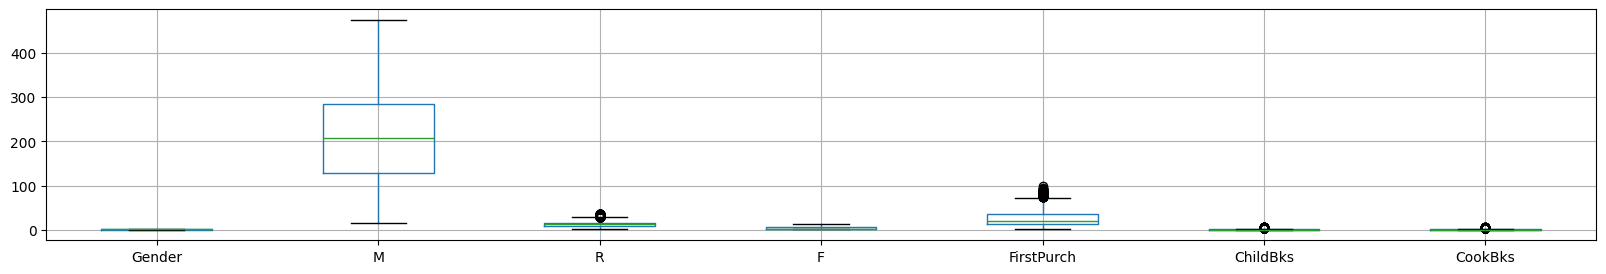

In [88]:
%matplotlib inline

data2 = data.drop(['Seq#', 'ID#', 'Florence', 'YouthBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt'],axis=1)
data2.boxplot(figsize=(20,3))

Number of rows before discarding outliers = 3200
Number of rows after discarding outliers = 2571
Index(['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks', 'CookBks'], dtype='object')


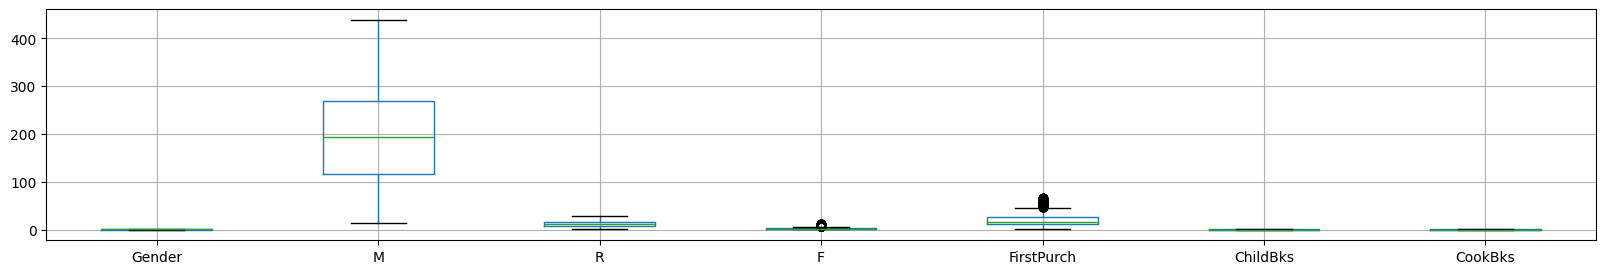

In [89]:
#removes outliers outside of interquartile range
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_no_outliers = remove_outliers_iqr(data2, data2.columns)
df_no_outliers.boxplot(figsize=(20,3))
print('Number of rows before discarding outliers = %d' % (data2.shape[0]))
print('Number of rows after discarding outliers = %d' % (df_no_outliers.shape[0]))
print(df_no_outliers.columns)

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)
pca = PCA(n_components=6)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)
print(transformed_data.shape[0])

2571


In [118]:
filtered_indices = df_no_outliers.index
Y_filtered = data.loc[filtered_indices, 'Florence']

# SMOTE
smote = SMOTE(random_state=1)
X_resampled, Y_resampled = smote.fit_resample(X_pca, Y_filtered)

# training/validation split
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_resampled, Y_resampled, train_size=0.7, random_state=1
)

Train = 0.877310; Validation = 0.772608
0.81 AUC with a standard deviation of 0.03
0.72 recall with a standard deviation of 0.04
Accuracy on test data is 0.58
0.56 AUC with a standard deviation of 0.10


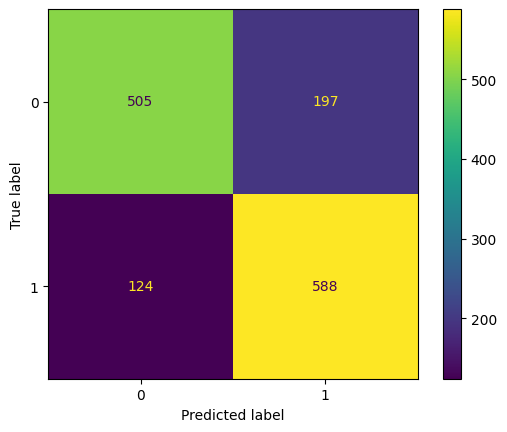

Train = 0.915787; Validation = 0.790996
0.83 AUC with a standard deviation of 0.03
0.75 recall with a standard deviation of 0.03
Accuracy on test data is 0.56
0.56 AUC with a standard deviation of 0.09


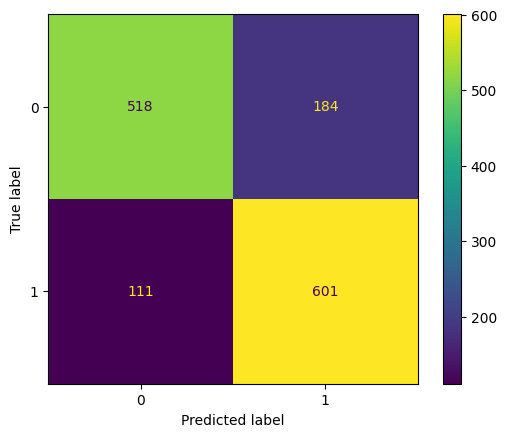

Train = 0.999089; Validation = 0.827973
0.83 AUC with a standard deviation of 0.02
0.76 recall with a standard deviation of 0.02
Accuracy on test data is 0.57
0.54 AUC with a standard deviation of 0.15


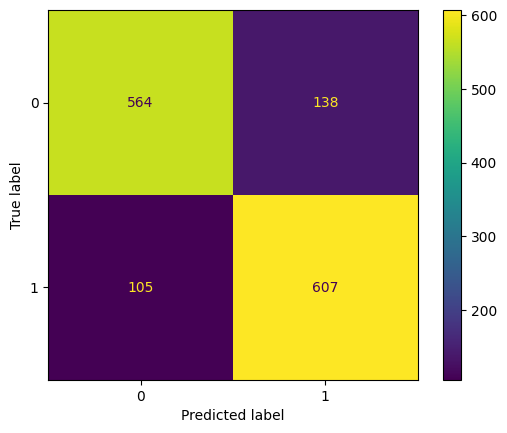

In [123]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
numBaseClassifiers = 100
maxdepth = 10
models = []
trainAcc = []
testAcc = []
i=0


best_params = {
    'max_depth': 10,
    'min_samples_leaf': 5,
    'min_samples_split': 5,
    'n_estimators': 200
}

clf = ensemble.RandomForestClassifier(**best_params, random_state=1, class_weight='balanced')
models.append(clf)

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers) #bagging classifier
models.append(clf)


clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers, algorithm='SAMME') #AdaBoost
models.append(clf)


for mod in models:
    # Fit the model
    mod.fit(X_train, Y_train)

    # Predictions
    Y_predTrain = mod.predict(X_train)
    Y_predTest = mod.predict(X_validation)

    # Accuracy scores
    trainAcc.append(balanced_accuracy_score(Y_train, Y_predTrain))
    testAcc.append(balanced_accuracy_score(Y_validation, Y_predTest))
    print('Train = %.6f; Validation = %.6f' % (trainAcc[i], testAcc[i]))

    # Cross-validation scores
    scores = cross_val_score(mod, X_validation, Y_validation, cv=10, scoring='roc_auc')
    print("%0.2f AUC with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    scores1 = cross_val_score(mod, X_validation, Y_validation, cv=10, scoring='recall_weighted')
    print("%0.2f recall with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

    # Test set prediction
    predTest = mod.predict(X_test_pca)
    print('Accuracy on test data is %.2f' % (balanced_accuracy_score(testSetY, predTest)))

    scores2 = cross_val_score(mod, X_test_pca, testSetY, cv=10, scoring='roc_auc')
    print("%0.2f AUC with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

    # Confusion matrix
    cm = confusion_matrix(Y_validation, Y_predTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    i += 1

# Part II

In [50]:
from sklearn.cluster import HDBSCAN, k_means, KMeans

In [5]:
data = pd.read_csv('http://pluto.hood.edu/~dong/datasets/osa_hf.csv',header='infer')
data.head()

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
0,0.217430,0,0.902069,0.611765,0.45,0.0,0.068493,0.090909,0.564516,0.103448,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.253176,0,0.117953,0.670588,0.25,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.255539,0,0.125375,0.541176,0.35,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.124372,0,0.236605,0.294118,0.50,0.0,0.013699,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.188183,0,0.404237,0.635294,0.35,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
data = data.replace('?',np.NaN)

print('Number of missing values by column:')
print(data.isna().sum())

print("\nTotal number of missing values = %d" % (data.isna().sum().sum()))

print('\nNumber of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of missing values by column:
bmi                                           0
hospital_expire_flag                          0
los                                           0
age                                           0
charlson                                      0
                                             ..
admission_type_EU OBSERVATION                 0
admission_type_EW EMER.                       0
admission_type_OBSERVATION ADMIT              0
admission_type_SURGICAL SAME DAY ADMISSION    0
admission_type_URGENT                         0
Length: 764, dtype: int64

Total number of missing values = 0

Number of instances = 10841
Number of attributes = 764


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
!pip install umap-learn
%matplotlib inline

# Dimension reduction and clustering libraries
import umap.umap_ as umap
from sklearn.cluster import HDBSCAN
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [75]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)
embedding = reducer.fit_transform(data)  # Original UMAP transformation

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


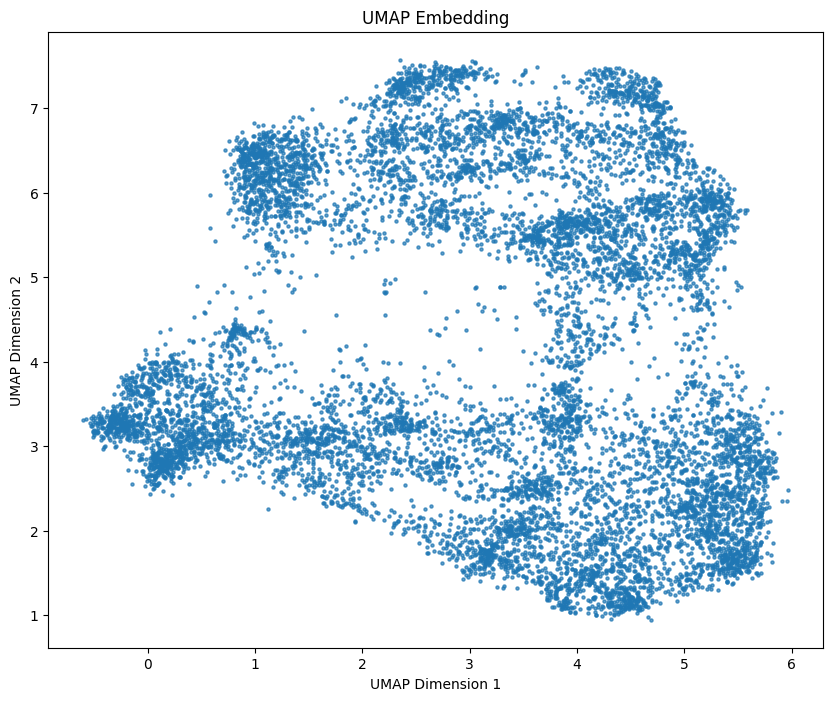

In [76]:
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.7)
plt.title("UMAP Embedding")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

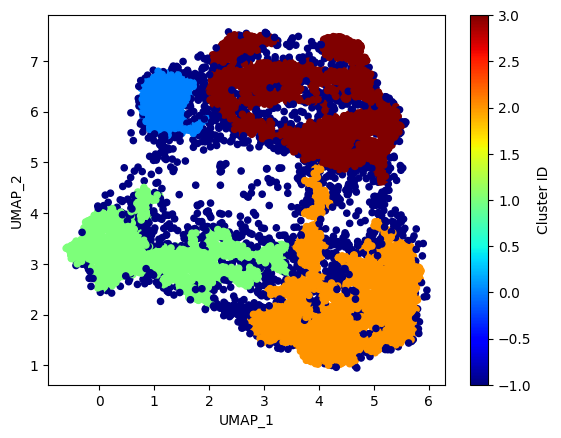

In [77]:
embedding_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
db = HDBSCAN(min_samples = 10, min_cluster_size = 500).fit(embedding_df)

#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
#print(len(core_samples_mask[core_samples_mask == True]))

labels2 = pd.DataFrame(db.labels_, columns=['Cluster ID']).reset_index(drop=True)
result = pd.concat((embedding_df,labels2), axis=1)
result.plot.scatter(x="UMAP_1",y="UMAP_2",c='Cluster ID', colormap='jet')

In [78]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(embedding, labels2)
print(f"Silhouette Score: {silhouette:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.3655


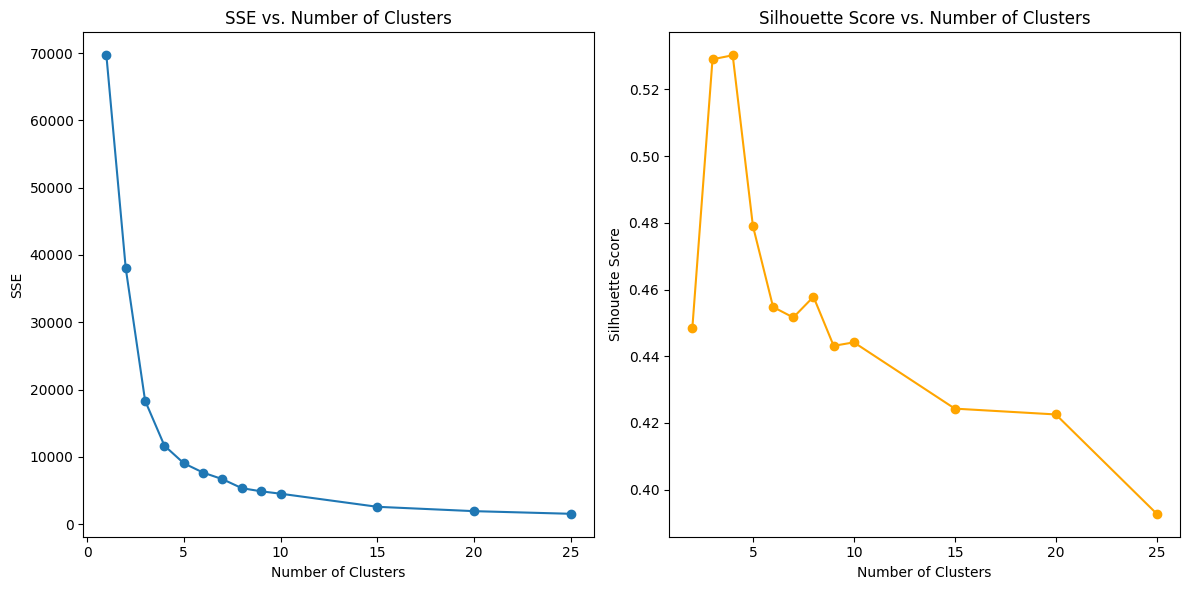

In [79]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
SSE = []
silhouette_scores = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, random_state=42)
    k_means.fit(embedding)
    SSE.append(k_means.inertia_)  # Append SSE
    if k > 1:
        score = silhouette_score(embedding, k_means.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# Plot SSE and Silhouette Score
plt.figure(figsize=(12, 6))

# Plot SSE
plt.subplot(1, 2, 1)
plt.plot(numClusters, SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(numClusters[1:], silhouette_scores[1:], marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

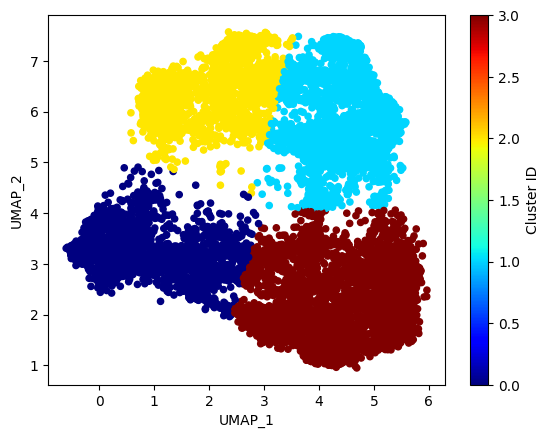

In [126]:
k_means = KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(embedding)
labels = k_means.labels_

labels4 = pd.DataFrame(labels, columns=['Cluster ID']).reset_index(drop=True)
result = pd.concat((embedding_df,labels4), axis=1)
result.plot.scatter(x="UMAP_1",y="UMAP_2",c='Cluster ID', colormap='jet')

In [81]:
reconstructed_centroids = reducer.inverse_transform(k_means.cluster_centers_)

centroid_df = pd.DataFrame(reconstructed_centroids, columns=data.columns)
print(centroid_df)

        bmi  hospital_expire_flag       los       age  charlson  \
0  0.199669              0.050370  0.184275  0.575023  0.287079   
1  0.172298             -0.000082  0.182756  0.476670  0.189221   
2  0.227163              0.037324  0.194878  0.525941  0.264934   
3  0.157843              0.047474  0.168477  0.676652  0.288834   

   Calculated Bicarbonate, Whole Blood  Calculated Total CO2  \
0                             0.031969             -0.029174   
1                             0.001063              0.003326   
2                            -0.035014             -0.032087   
3                             0.028996              0.037623   

   Chloride, Whole Blood  Free Calcium   Glucose  ...  insurance_Medicare  \
0              -0.033087     -0.034349 -0.028186  ...            0.921663   
1               0.000829      0.003238  0.004147  ...           -0.010754   
2              -0.033855     -0.032971 -0.033527  ...           -0.050590   
3              -0.005361     -0.022

# Write-up

Part I of this project is constrained by a severe class imbalance. Namely, far fewer instances of individuals purchasing the Florence book exist than those who did not purchase the book. As such, simple application of the data to train a model results in an accuracy score that is artificially high. It only exceeds ninety percent as the overall distribution of the negative case is so high in both datasets. Thus, several pre-processing steps are applied to help mitigate these issues. Columns with a very low importance value are eliminated on subsequent testing. Missing values are checked, outliers are eliminated, the data is transformed, and synthetic data is added to the training set via SMOTE. Despite these efforts, the models demonstrate only a slightly better than chance average of balanced accuracy, and this exists in a stark contrast to the relatively higher values of the validation set. Several issues that might cause this include data leak, poor tuning of model parameters, and overfitting.

It is also important to note that the literature highlights certain deficiencies in SMOTE, including the ignorance of subclasses and confining in the line segment between seed samples [2]. Erofeev and Papanov found that there were not consistent factors that made one resampling method more preidctably reliable in training models that another [3]. As a result, other means of oversampling exist to correct these deficiencies. In the future work of this project, it would be prudent to evaluate the balanced accuracy of models using these generators of synthetic data.

The models tested on the Charles Book Club dataset include a random forest classifier, bagging classifier, and adaboost classifier. In general, the models classify with 88%, 91%, and 99% balanced accuracy on the training set and around 80% on the validation set. The AUC score also is generally in the low 80s, and recall in the low to middle 70s. The AUC and balanced accuracy for the test set lie in the low to middle 50s. The stark difference in the values for the validation set and the test set indicate overfitting may be occuring.

Overall, additional testing is likely necessary to fully explore what pre-processing steps might help in identifying the solution to the class imbalance problem. Oversampling and the addition of quality synthetic data should be a clear avenue for further research of this problem.

Part II of this project, clustering based on health data, was largely impacted by the massive dimensionality of the dataset. As a result, it was necessary in the data pre-processing steps to engage in dimensionality reduction of the data. Other pre-processing checks were also implmented including the search for any missing data. Dimensionality reduction was carried out via UMAP, and reduced down to two dimensions.

After the reduction was carried out, HDBSCAN and k-means clustering were evaluated. HDBSCAN identified 4 clusters and noise with a silhoutette score of 0.36. K-means clustering was evaluated at various values of k, and 4 was found to demonstrate the highest silhouette score at 0.51. This value was indicative of a higher level of quality and separation of clusters. The reduced data was also inversely transformed in order to find the centroids of the clusters of each column. Thus, certain characteristic conclusions could be drawn about each cluster. They are differentiated by age, insurance, admission type, and hundreds of other characteristics. Additional analysis could elicit conclusions regarding the likelihood of certain health outcomes.

In conclusion, both sections of this project involved the recognition of certain unapparent patterns from large datasets. Both were realistically constrained by certain qualities of the data including class imbalances and high dimensionality. All aspects of this project required data pre-processing and other elements to improve the overall evaluation of the model. As such, the implications and requirements that this project emphasizes are widely applicable to the field of data mining.

# References

[1] F. Pedregosa et al., "Scikit-learn: Machine learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825–2830, 2011. [Online]. Available: https://scikit-learn.org

[2]Z. Zheng, Y. Cai, and Y. Li, "Oversampling method for imbalanced classification," Computing and Informatics, vol. 34, no. 5, pp. 1017–1037, 2015.

[3] E. Burnaev, P. Erofeev, and A. Papanov, "Influence of resampling on accuracy of imbalanced classification," in Proc. 8th Int. Conf. Machine Vision (ICMV 2015), vol. 9875, pp. 423–427, Dec. 2015.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert
!cp "./drive/My Drive/Colab Notebooks/final_project_V2.ipynb" ./
!jupyter nbconvert --to PDF "final_project_V2.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook final_project_V2.ipynb to PDF
[NbConvertApp] Support files will be in final_project_V2_files/
[NbConvertApp] Making directory ./final_project_V2_files
[NbConvertApp] Writing 74370 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 541781 bytes to final_project_V2.pdf